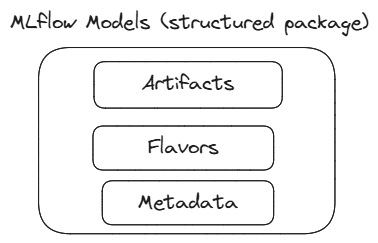
# MLflow Models:

An MLflow Model is a standard format for packaging machine learning models that can be used in a variety of downstream tools. It lets you save a model in different “flavors” that can be understood by different downstream tools.

## What is a MLflow Flavor?

Flavors are the key concept that makes MLflow Models powerful: they are a convention that deployment tools can use to understand the model, which makes it possible to write tools that work with models from any ML library without having to integrate each tool with each library. 

## Built-In Model Flavors

* Python Function (python_function)

* R Function (crate)

* H2O (h2o)

* Keras (keras)

* MLeap (mleap)

* PyTorch (pytorch)

* Scikit-learn (sklearn)

* Spark MLlib (spark)

* TensorFlow (tensorflow)

* ONNX (onnx)

* MXNet Gluon (gluon)

* XGBoost (xgboost)

* LightGBM (lightgbm)

* CatBoost (catboost)

* Spacy(spaCy)

* Fastai(fastai)

* Statsmodels (statsmodels)

* Prophet (prophet)

* Pmdarima (pmdarima)

* OpenAI (openai) (Experimental)

* LangChain (langchain) (Experimental)

* John Snow Labs (johnsnowlabs) (Experimental)

* Diviner (diviner)

* Transformers (transformers) (Experimental)

* SentenceTransformers (sentence_transformers) (Experimental)

* Promptflow (promptflow) (Experimental)



## MLmodel file

```python
# Directory written by mlflow.sklearn.save_model(model, "my_model")
my_model/
├── MLmodel
├── model.pkl
├── conda.yaml
├── python_env.yaml
└── requirements.txt
```

## Sklearn Flavor

The mlflow.sklearn module provides an API for logging and loading scikit-learn models. This module exports scikit-learn models with the following flavors:

In [1]:
# Create experiment
import mlflow 
from mlflow_for_ml_dev.experiments.exp_utils import get_or_create_experiment

name = "mlflow-flavors"
tags={
        "project_name": "logging_models",
        "topic":"run_management",
        "mlflow.note.content": "This experiment is used to log sklearn models"
    }

experiment = get_or_create_experiment(experiment_name=name, tags=tags)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

with mlflow.start_run(run_name="logging-random-forest") as run:
    mlflow.sklearn.log_model(sk_model = rfc, artifact_path = "random-forest-model")

## Model With Signature

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from mlflow.models.signature import infer_signature
import mlflow 

In [ ]:
# load the iris dataset
iris = load_iris(as_frame=True)
x = iris.data
y = iris.target

# infer signature
signature = infer_signature(model_input=x, model_output=y)

In [ ]:
for input in signature.inputs:
    print(input)

In [ ]:
for input in signature.outputs:
    print(input)

In [8]:
rfc = RandomForestClassifier()

rfc.fit(x, y)

with mlflow.start_run(run_name="logging_with_signature", experiment_id=experiment.experiment_id):
    # Log the model
    mlflow.sklearn.log_model(sk_model=rfc, artifact_path = rfc.__class__.__name__, signature=signature)

## Logging with input example

In [ ]:
# get a sample input
input_example = x.iloc[0:10]
print(input_example)

In [ ]:
rfc = RandomForestClassifier()

with mlflow.start_run(run_name="logging_with_input_example", experiment_id=experiment.experiment_id): 
    # Log the model
    mlflow.sklearn.log_model(
        sk_model = rfc,
        artifact_path = rfc.__class__.__name__,
        signature = signature,
        input_example = input_example
    )